In [16]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/dataset'
train_dir = '/content/drive/My Drive/dataset/train'
validation_dir = '/content/drive/My Drive/dataset/validation'
test_dir = '/content/drive/My Drive/dataset/test'

train_nv_dir = '/content/drive/My Drive/dataset/train/nv'
train_mel_dir = '/content/drive/My Drive/dataset/train/mel'
train_df_dir = '/content/drive/My Drive/dataset/train/df'
train_bkl_dir = '/content/drive/My Drive/dataset/train/bkl'
train_bcc_dir = '/content/drive/My Drive/dataset/train/bcc'

validation_nv_dir = '/content/drive/My Drive/dataset/validation/nv'
validation_mel_dir = '/content/drive/My Drive/dataset/validation/mel'
validation_df_dir = '/content/drive/My Drive/dataset/validation/df'
validation_bkl_dir = '/content/drive/My Drive/dataset/validation/bkl'
validation_bcc_dir = '/content/drive/My Drive/dataset/validation/bcc'

test_nv_dir = '/content/drive/My Drive/dataset/test/nv'
test_mel_dir = '/content/drive/My Drive/dataset/test/mel'
test_df_dir = '/content/drive/My Drive/dataset/test/df'
test_bkl_dir = '/content/drive/My Drive/dataset/test/bkl'
test_bcc_dir = '/content/drive/My Drive/dataset/test/bcc'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
num_nv_train = len(os.listdir(train_nv_dir))
num_mel_train = len(os.listdir(train_mel_dir))
num_df_train = len(os.listdir(train_df_dir))
num_bkl_train = len(os.listdir(train_bkl_dir))
num_bcc_train = len(os.listdir(train_bcc_dir))

num_nv_validation = len(os.listdir(validation_nv_dir))
num_mel_validation = len(os.listdir(validation_mel_dir))
num_df_validation = len(os.listdir(validation_df_dir))
num_bkl_validation = len(os.listdir(validation_bkl_dir))
num_bcc_validation = len(os.listdir(validation_bcc_dir))

num_nv_test = len(os.listdir(test_nv_dir))
num_mel_test = len(os.listdir(test_mel_dir))
num_df_test = len(os.listdir(test_df_dir))
num_bkl_test = len(os.listdir(test_bkl_dir))
num_bcc_test = len(os.listdir(test_bcc_dir))

print('Total Training Images of nv:', num_nv_train)
print('Total Training Images of mel:', num_mel_train)
print('Total Training Images of df:', num_df_train)
print('Total Training Images of bkl:', num_bkl_train)
print('Total Training Images of bcc:', num_bcc_train)
print('\n************************\n')
print('Total Validation Images of nv:', num_nv_validation)
print('Total Validation Images of mel:', num_mel_validation)
print('Total Validation Images of df:', num_df_validation)
print('Total Validation Images of bkl:', num_bkl_validation)
print('Total Validation Images of bcc:', num_bcc_validation)
print('\n************************\n')
print('Total Testing Images of nv:', num_nv_test)
print('Total Testing Images of mel:', num_mel_test)
print('Total Testing Images of df:', num_df_test)
print('Total Testing Images of bkl:', num_bkl_test)
print('Total Testing Images of bcc:', num_bcc_test)

Total Training Images of nv: 3330
Total Training Images of mel: 3321
Total Training Images of df: 2466
Total Training Images of bkl: 3311
Total Training Images of bcc: 3276

************************

Total Validation Images of nv: 715
Total Validation Images of mel: 711
Total Validation Images of df: 529
Total Validation Images of bkl: 711
Total Validation Images of bcc: 703

************************

Total Testing Images of nv: 713
Total Testing Images of mel: 709
Total Testing Images of df: 528
Total Testing Images of bkl: 709
Total Testing Images of bcc: 702


In [19]:
total_train = num_nv_train + num_mel_train + num_df_train + num_bkl_train + num_bcc_train
total_validation = num_nv_validation + num_mel_validation + num_df_validation + num_bkl_validation + num_bcc_validation
total_test = num_nv_test + num_mel_test + num_df_test + num_bkl_test + num_bcc_test

print('Total Training Images:', total_train)
print('Total Validation Images:', total_validation)
print('Total Testing Images:', total_test)

Total Training Images: 15704
Total Validation Images: 3369
Total Testing Images: 3361


Found 15704 images belonging to 5 classes.


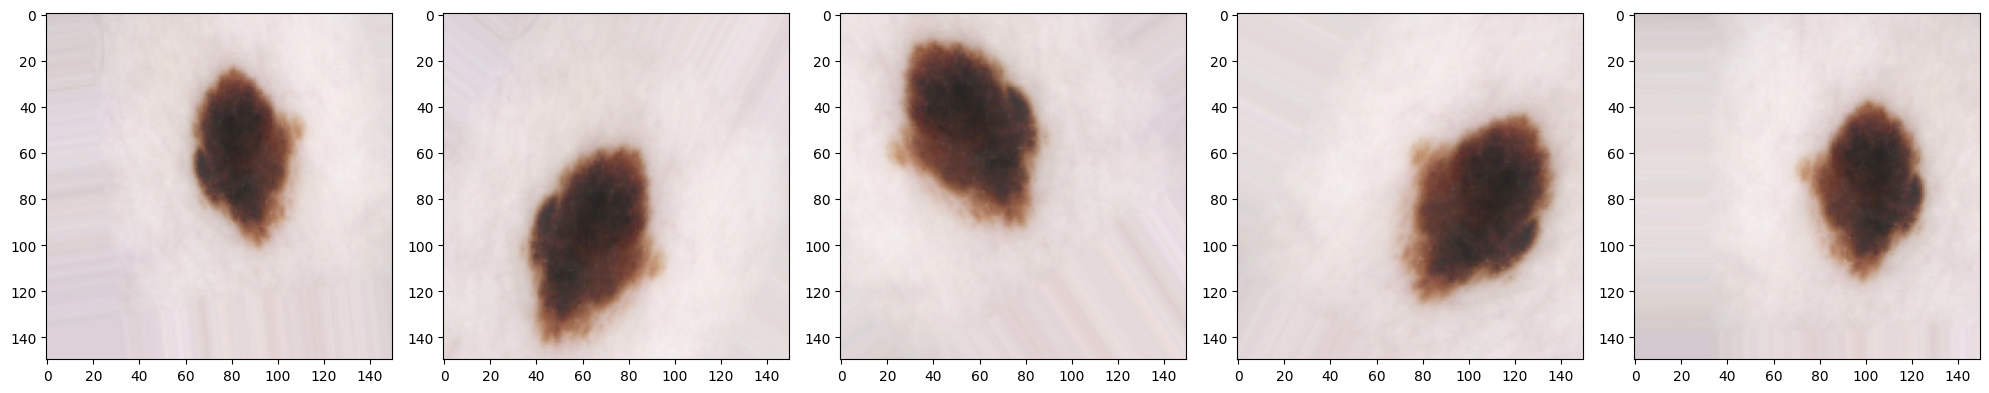

In [20]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

image_gen_train = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                     zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='categorical')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, directory=validation_dir, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='categorical')

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE, directory=test_dir, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5)
])

Found 3369 images belonging to 5 classes.
Found 3361 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,455,173 (13.18 MB)

 Trainable params: 3,455,173 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

# Solucion para el entrenamiento
Se tubo un problema con el entrenamiento que se soluciono con la funcion infinite_generator

In [25]:
epochs=7
def infinite_generator(generator):
    while True:
        for batch in generator:
            yield batch

train_data_gen_inf = infinite_generator(train_data_gen)
val_data_gen_inf = infinite_generator(val_data_gen)

history = model.fit(
    train_data_gen_inf,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen_inf,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))),
    verbose= 1
)


Epoch 1/7
158/158 ━━━━━━━━━━━━━━━━━━━━ 1155s 7s/step - accuracy: 0.5066 - loss: 1.1634 - val_accuracy: 0.4464 - val_loss: 1.3347
Epoch 2/7
158/158 ━━━━━━━━━━━━━━━━━━━━ 1179s 7s/step - accuracy: 0.5224 - loss: 1.1347 - val_accuracy: 0.4289 - val_loss: 1.3318
Epoch 3/7
158/158 ━━━━━━━━━━━━━━━━━━━━ 1138s 7s/step - accuracy: 0.5416 - loss: 1.0767 - val_accuracy: 0.4438 - val_loss: 1.2351
Epoch 4/7
158/158 ━━━━━━━━━━━━━━━━━━━━ 1133s 7s/step - accuracy: 0.5779 - loss: 1.0156 - val_accuracy: 0.5568 - val_loss: 1.0728
Epoch 5/7
158/158 ━━━━━━━━━━━━━━━━━━━━ 1170s 7s/step - accuracy: 0.6104 - loss: 0.9624 - val_accuracy: 0.4951 - val_loss: 1.1233
Epoch 6/7
158/158 ━━━━━━━━━━━━━━━━━━━━ 1166s 7s/step - accuracy: 0.6243 - loss: 0.9355 - val_accuracy: 0.5364 - val_loss: 1.0782
Epoch 7/7
158/158 ━━━━━━━━━━━━━━━━━━━━ 1157s 7s/step - accuracy: 0.6141 - loss: 0.9362 - val_accuracy: 0.5358 - val_loss: 1.2313


range(0, 7)


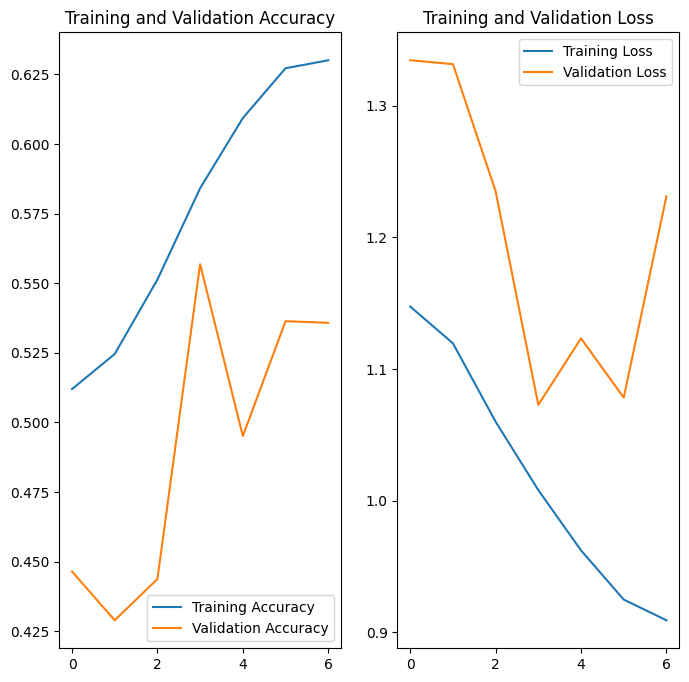

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
print(epochs_range)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
